# RBC

In this notebook all preprocessing steps for creating the final RBC corpus are run as well as the persistence tagging algorithm for the qualitative analysis. 

As mentioned, the actual data used in the doctoral thesis needs to be requested from Ingo Siegert. Once the actual data is available, save it in the two folders "Transkripte" (actual transcripts) and "Utterances" (speaker lists) in "RBC/1_Corpus/Original_files", as shown here:

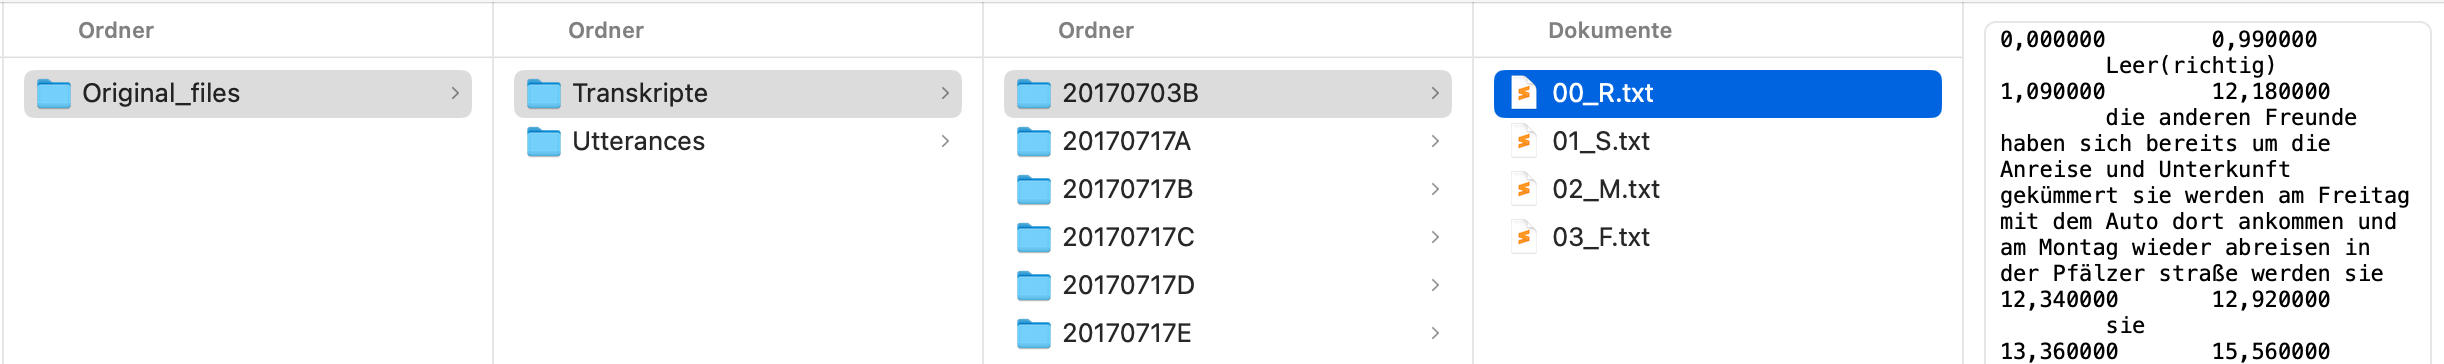

Have a look at the notebook for VACC if you want to see it executed using dummy data.

Refer to the relevant chapters in the doctoral thesis for further explanation of the steps below. 

In [ ]:
#importing relevant modules
import pandas as pd, json, sys, os, warnings, re
from tqdm import tqdm
warnings.simplefilter(action='ignore', category=FutureWarning)

#informing Python about a custom code directory and importing some of the modules from there
sys.path.append("../Code/")
import preprocessing, persistence, visualisation

In [ ]:
#defining corpus name 
#(some modules contain corpora-specific code, thus a variable with the corpus name is needed to ensure the right code is executed)
which_corpus = "RBC"

## Data Preprocessing

### Creating one csv file

The following code creates *one* csv file containing all turns from all interactions.

In [ ]:
#paths to folders with transcripts and speaker list (who made which utterance)
root_transcripts = f"1_Corpus/Original_files/Transkripte/"
root_speakers = f"1_Corpus/Original_files/Utterances/"
output_destination = f"1_Corpus/Corpus_{which_corpus}.csv"

preprocessing.file_creator_rbc(root_transcripts, root_speakers, output_destination)

### Merging same-speaker turns

The following code merges consecutive same-speaker turns.

In [ ]:
preprocessing.turn_merger(f"1_Corpus/Corpus_{which_corpus}.csv", 
                          f"1_Corpus/Corpus_merged_turns_{which_corpus}.csv")

Note that, as explained in the thesis, manual unmerging was performed in certain cases. Hence, when running this notebook with the actual data, it will eventually differ from the data used in the study as this manual step as well as the manual lemma correction step mentioned below cannot be replicated here.

### Tokenising and lemmatising data 

Note that, as explained in the thesis, POS-tagging was initially also performed. As its output was not used this step is disregarded here.

Lemmatisation was performed with both TreeTagger and RNNTagger. As explained in the thesis, the RNNTagger's output proved to be most reliable. To execute the following steps you need to download the [RNNTagger](https://www.cis.lmu.de/~schmid/tools/RNNTagger/) and follow the installation steps indicated there. 

The RNNTagger expects a simple file with one token per row. To be able to remap tagged tokens to their corresponding metadata (which turn they belong to, by which speaker etc.), during tokenisation below, an additional list (`tokens_for_remapping`) is outputted which contains the same tokens as well as a turn boundary marker. This marker enables remapping the tokens to their respective turn, once they have been tagged.

In [ ]:
#tokenising using custom code for later token remapping
tokens_for_remapping = preprocessing.tokenise(f"1_Corpus/Corpus_merged_turns_{which_corpus}.csv", 
                                              "2_Preprocessed/Files/txt_file_for_tagger.txt")

Next, run the following lines in your command line inside the conda environment, replacing "rnntagger_path" with the absolute path to your RNNTagger directory, "txt_file_for_tagger.txt" with the absolute path to said file (created in the cell above) and "output" with the absolute path leading to a new file called "RBC/2_Preprocessed/Files/RNN_tagged.txt" (i.e., complement that path based on where you stored the entire repository on your computer). Execute the middle line only if permission errors occur.

In [ ]:
#remapping tagged tokens to their respective turn
preprocessing.remap(f"1_Corpus/Corpus_merged_turns_{which_corpus}.csv", #corpus
                    f"2_Preprocessed/Files/RNN_tagged.txt", #tagger output
                    tokens_for_remapping, #needed for remapping tagger output to corpus
                    f"2_Preprocessed/RNN_{which_corpus}_unigrams.csv", #destination of remapped corpus
                    which_corpus)

Note that, as explained in the thesis, manual lemma correction was performed at this point. 

### Creating lemma bi-, tri-, and quadrigrams

The following code creates lemma n-grams.

In [ ]:
preprocessing.ngrammer(f"2_Preprocessed/RNN_{which_corpus}_unigrams.csv", which_corpus)

Preprocessing of the corpus is now done. Note again that even if you ran the code with the actual data, it will to some extent be different from the data used in the thesis due to non-replicable manual steps (see above). 

For the quantitative analysis see separate notebooks in the directory "Quantitative_Analysis". This code is in separate notebooks as some quantitative analyses extend beyond one single corpus and are thus organised with regard to alternation sets. Also, a different programming language (R) is used.

## Persistence Tagging for the Qualitative Analysis

As mentioned in the thesis, the persistence tagging algorithm can be used to tag cases of persistence on multiple levels such as lemmata, POS-tags etc. However, the qualitative analysis in the thesis relied solely on lemma-based tagging. This is defined in the following cell, along with stop lemmata and lemmata from the instructions, both of which will be excluded from tagging. For simplicity, the actual instructions are excluded even when using dummy data.

Also note that `tagger` can be used to tag, e.g., cases of persistence from the human speaker to the voice assistant (i.e., tagging cases of quasi-persistence). For that, pass different values for the corresponding arguments than the default ones which implement allo-persistence from voice assistant to human speaker. 

### Preparations

In [ ]:
levels = ["lemma"] #defining level to tag on 

stoplemmas = ['an', 'der', 'ein', 'es', 'für', 'haben', 'ich', 'in', 'mit', 
              'nicht', 'oder', 'sein', 'um', 'und', 'von', 'werden', 'zu'] #defining stopwords to exclude from tagging

### Tagging

#### Unigrams

In [ ]:
#reading unigram corpus
corpus = pd.read_csv(f"2_Preprocessed/RNN_{which_corpus}_unigrams.csv", sep=",", index_col=0, na_filter=False)

#passing unigram corpus to persistence tagger while specifying levels, output destination and stoplemmas
persistence.tagger(corpus, which_corpus, levels, f"3_Persistence_tagged/single_ngrams/Persistence_{which_corpus}_unigrams.csv", stopwords=stoplemmas)

#### Bigrams

In [ ]:
#reading bigram corpus
corpus = pd.read_csv(f"2_Preprocessed/RNN_{which_corpus}_bigrams.csv", sep=",", index_col=0, na_filter=False)

#passing bigram corpus to persistence tagger while specifying levels and output destination 
persistence.tagger(corpus, which_corpus, levels, f"3_Persistence_tagged/single_ngrams/Persistence_{which_corpus}_bigrams.csv")

#### Trigrams

In [ ]:
#reading trigram corpus
corpus = pd.read_csv(f"2_Preprocessed/RNN_{which_corpus}_trigrams.csv", sep=",", index_col=0, na_filter=False)

#passing trigram corpus to persistence tagger while specifying levels and output destination 
persistence.tagger(corpus, which_corpus, levels, f"3_Persistence_tagged/single_ngrams/Persistence_{which_corpus}_trigrams.csv")

#### Quadrigrams

In [ ]:
#reading quadrigram corpus
corpus = pd.read_csv(f"2_Preprocessed/RNN_{which_corpus}_quadrigrams.csv", sep=",", index_col=0, na_filter=False)

#passing quadrigram corpus to persistence tagger while specifying levels and output destination 
persistence.tagger(corpus, which_corpus, levels, f"3_Persistence_tagged/single_ngrams/Persistence_{which_corpus}_quadrigrams.csv")

For simplicity, the following code combines all n-gram levels into one DataFrame.

In [ ]:
persistence.combiner("3_Persistence_tagged/single_ngrams", f"3_Persistence_tagged/Persistence_{which_corpus}_all.csv", which_corpus)

### Visualisation

The following code visualises tagged cases of persistence on all n-grams levels in HTML files.

In [ ]:
visualisation.lemma(which_corpus, "3_Persistence_tagged", "3_Persistence_tagged/visualisation")

### Inspecting frequent cases of persistence

The following code outputs frequent cases of persistence for each n-gram level.

In [ ]:
visualisation.inspect(levels = ["lemma"], #further levels such as POS-tags could be supplied if tagging was performed on that level
                      ngrams = ["unigrams", "bigrams", "trigrams", "quadrigrams"], 
                      threshold = 0, 
                      which_corpus =  which_corpus, 
                      path = "3_Persistence_tagged/single_ngrams")